<a href="https://colab.research.google.com/github/itsnaeema/ML_Project/blob/main/NLP_twitter_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#first import all the packages that needed,and make data frame
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [ ]:
df=pd.read_csv('/content/twitter_validation.csv',header=None,encoding='ISO-8859-1')
#in this file there is no header so we pass none,also in nlp encoding also pass because ther should be any emojis in revie or any other charcter
df.columns=['Id','Social_media','target','text']#passing header column
df


,Id,Social_media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.dtypes

Id               int64
Social_media    object
target          object
text            object
dtype: object

In [ ]:
df.isna().sum()

Id              0
Social_media    0
target          0
text            0
dtype: int64

In [ ]:
#first collct the count of target
df['target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

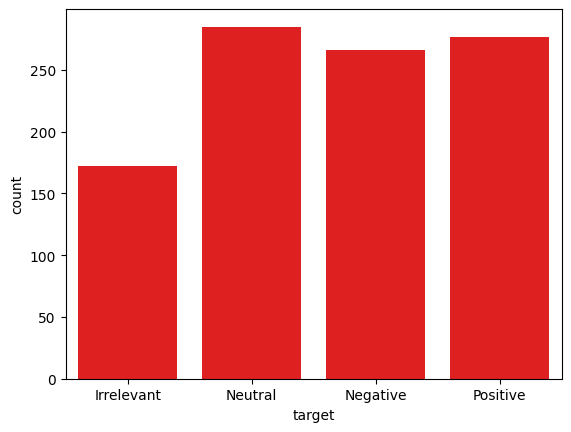

In [ ]:
sns.countplot(x='target',data=df,color='red')

In [ ]:
#here irrvelent is unwanted in target so we should remove
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)#axis=0(bcs we are dropin in row,also inplace=true(athe data setl change veran))
df

,Id,Social_media,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#there is index mistake while droping,to rest:-
df.reset_index(drop=True,inplace=True)
df

,Id,Social_media,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#to check is the review is -ve or +ve,so we dont need id and social media
df.drop(['Id','Social_media'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#target is predicting column,so we should change them into numerical bcs they are in objct form
#map method to replace,(also we can use another method str.replace) -
#postive :1   negative :-1 neutral :0

df['target']=df['target'].str.replace('Positive','1')
df['target']=df['target'].str.replace('Negative','-1')
df['target']=df['target'].str.replace('Neutral','0')
df['target']=df['target'].astype(float)
df

#or
# df['target']=df['target'].map({'Positve':1,'Neutral':0,'Negative':-1})
# df

,target,text
0,0.0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1.0,@Microsoft Why do I pay for WORD when it funct...
2,-1.0,"CSGO matchmaking is so full of closet hacking,..."
3,0.0,Now the President is slapping Americans in the...
4,-1.0,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1.0,Please explain how this is possible! How can t...
824,1.0,Good on Sony. As much as I want to see the new...
825,1.0,Today sucked so itâs time to drink wine n pl...
826,1.0,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.isna().sum()

target    0
text      0
dtype: int64

In [ ]:
#in text column all are in sentence so we should do all preprocessing steps using nlp
#so we sholud download all the packages in order to do preprocessing steps
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#creat a variable to store the sentence in column(text)
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
#Tokenization
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()#tk
#to join the token as by joining by space ie (i am naeema )instead of one by one
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))#syntax of lambda: variable : operation
tweets#it is an key word in nlp



0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
#removing special characters
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')# '+' to remove same special charcter continuosly
tweets

<ipython-input-83-9b992db5d630>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')# '+' to remove same special charcter continuosly


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [ ]:
#a word that not meaninglful should be remove other than stopwords,ie a word should have atleast 3 lettr to be meaningful
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))#list comprehnstion
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [ ]:
#stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [ ]:
#removing stop word
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [ ]:
#vectorization-by doing this it convert into numerical form
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)#store the numerical values into traindata
print(train_data)

  (0, 691)	0.2608257828483461
  (0, 1004)	0.2608257828483461
  (0, 1130)	0.23509805002803952
  (0, 1996)	0.13277165480466424
  (0, 309)	0.22681557001542715
  (0, 860)	0.17354914655342313
  (0, 807)	0.21432663830218204
  (0, 2761)	0.2608257828483461
  (0, 568)	0.2608257828483461
  (0, 1833)	0.24577602391989378
  (0, 633)	0.22681557001542715
  (0, 376)	0.1515362387424402
  (0, 2287)	0.38864111655856126
  (0, 538)	0.49155204783978756
  (1, 797)	0.4055823664694651
  (1, 2891)	0.4055823664694651
  (1, 2558)	0.3821800909185634
  (1, 1405)	0.4055823664694651
  (1, 3679)	0.36557591217188057
  (1, 2462)	0.3126902562590763
  (1, 3639)	0.26216072802580975
  (1, 2155)	0.24555654927912696
  (2, 1427)	0.1689251539717079
  (2, 486)	0.36574263611909275
  (2, 3432)	0.36574263611909275
  :	:
  (825, 3393)	0.3395996844494919
  (825, 3383)	0.2560582225152134
  (825, 631)	0.22981061112100945
  (825, 997)	0.2315686698425631
  (825, 3373)	0.21750175079084832
  (825, 3226)	0.2904718522758868
  (825, 2527)	0.1

In [ ]:
train_data.shape#x data in this variable#word diveded into 3783 columns sentence(row)-828

(828, 3783)

In [ ]:
#assigning y output values
y=df['target'].values
y

array([ 0., -1., -1.,  0., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  0.,
       -1.,  1.,  1., -1.,  1., -1., -1.,  0., -1.,  0.,  0., -1., -1.,
        1.,  1., -1.,  1., -1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0., -1., -1., -1.,  0.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1.,  0., -1.,  0., -1.,  1., -1., -1.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0., -1., -1.,
        0.,  0., -1.,  1., -1., -1., -1.,  0.,  1.,  0., -1.,  1.,  1.,
        0.,  1.,  0.,  1., -1.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,
        1.,  1.,  0., -1., -1.,  1., -1.,  0., -1.,  1.,  0., -1.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1., -1.,
        0.,  0.,  0.,  0., -1.,  0.,  1., -1.,  0., -1.,  0., -1., -1.,
       -1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0., -1.,
       -1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0., -1., -1., -1., -1.,
        1.,  0.,  0.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  0., -1

In [ ]:
#then we create machine learning model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.20,random_state=42)
x_train

<662x3783 sparse matrix of type '<class 'numpy.float64'>'
	with 8419 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<166x3783 sparse matrix of type '<class 'numpy.float64'>'
	with 2086 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([ 0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  1.,  0.,
       -1.,  1.,  1.,  0.,  0., -1.,  1.,  1.,  0.,  0., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  0.,  1.,  1., -1.,  0., -1.,  1.,  1., -1.,
       -1.,  0., -1.,  1., -1., -1.,  1.,  0.,  1.,  1.,  0., -1.,  0.,
        0.,  0.,  0.,  0., -1., -1.,  0.,  0., -1., -1.,  0., -1., -1.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1., -1., -1.,  1.,
       -1.,  0.,  0., -1.,  1.,  1.,  1., -1., -1.,  0., -1.,  0.,  1.,
        1.,  0., -1.,  0., -1., -1.,  1.,  0., -1.,  1., -1., -1.,  1.,
        0.,  1., -1., -1.,  0.,  0.,  1., -1.,  1., -1.,  0.,  0., -1.,
       -1., -1., -1.,  0.,  0.,  1., -1.,  0.,  0., -1.,  1.,  1.,  1.,
       -1.,  0.,  1., -1., -1.,  1.,  0.,  1., -1., -1.,  1.,  1., -1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0., -1.,  1.,  0.,  1., -1.,
       -1., -1., -1., -1., -1., -1.,  0., -1.,  1., -1.,  0.,  1.,  0.,
        1.,  1.,  0.,  1., -1.,  1.,  0., -1.,  1., -1., -1.,  0

In [ ]:
y_test

array([ 1.,  1.,  1.,  0., -1., -1., -1.,  1., -1., -1., -1., -1.,  0.,
        1., -1.,  0.,  0.,  1., -1.,  1.,  0., -1.,  0.,  1.,  0.,  1.,
        1., -1.,  0.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  0., -1., -1., -1., -1.,  1.,
       -1.,  0.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  0.,  1.,
        1.,  0.,  0., -1., -1.,  1.,  1.,  0.,  1.,  0.,  0., -1., -1.,
        1.,  0.,  1.,  1., -1.,  1.,  0.,  1.,  0.,  1., -1.,  1., -1.,
        1., -1., -1.,  0.,  0.,  1.,  0., -1., -1.,  0.,  1.,  0.,  1.,
        1., -1.,  1.,  1.,  0.,  1.,  0.,  1., -1.,  0.,  1.,  1.,  1.,
       -1., -1., -1., -1.,  1.,  1., -1.,  0.,  0., -1.,  0.,  0.,  0.,
        1., -1.,  1.,  0., -1.,  1.,  1.,  1., -1.,  1.,  0.,  1.,  0.,
        1., -1.,  0., -1.,  0.,  0., -1.,  1.,  1.,  0., -1.,  0.,  0.,
        1.,  1., -1.,  0., -1., -1., -1., -1.,  0.,  0.])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,  1., -1.,  1.,
       -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  0.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  0.,  1., -1.,  1.,  0.,  1., -1.,  0.,  0., -1.,
        0.,  1.,  0., -1., -1., -1., -1.,  0.,  1.,  1., -1., -1., -1.,
        1.,  1., -1., -1., -1., -1.,  0., -1., -1.,  1.,  1., -1.,  1.,
       -1., -1., -1.,  0.,  0.,  0.,  0.,  0., -1., -1.,  1.,  0.,  0.,
       -1., -1.,  1.,  0.,  0., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  0., -1.,  1., -1.,  0.,  1.,  1., -1., -1.,  0., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  0.,
       -1.,  0.,  0.,  0., -1., -1., -1., -1., -1.,  1., -1., -1.,  0.,
        1.,  0., -1.,  0., -1., -1., -1.,  1.,  1.,  0.])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cmd=confusion_matrix(y_test,y_pred)
cmd


array([[42,  8,  5],
       [20, 17,  9],
       [37,  6, 22]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.4879518072289157